In [ ]:
#Milestone-3

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, VotingClassifier, StackingClassifier)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
#Loading the dataset
file_path = r"C:\Users\Akshaya\OneDrive\Desktop\VI\Final_Risk_Assessment_Dataset.csv"
df = pd.read_csv(file_path)

In [4]:
df.shape

(1048575, 14)

In [5]:
#checking for missing values
print(df.isnull().sum())

time                0
latitude_x          0
depth               0
geo_cluster         0
place               0
longitude_x         0
tsunami             0
risk_score          0
soil_score          0
SNUM                0
SQKM                0
DOMSOI              0
final_risk_index    0
risk_category       0
dtype: int64


In [6]:
print(df.columns.tolist())

['time', 'latitude_x', 'depth', 'geo_cluster', 'place', 'longitude_x', 'tsunami', 'risk_score', 'soil_score', 'SNUM', 'SQKM', 'DOMSOI', 'final_risk_index', 'risk_category']


In [7]:
print(df.dtypes)

time                float64
latitude_x          float64
depth               float64
geo_cluster           int64
place                 int64
longitude_x         float64
tsunami               int64
risk_score          float64
soil_score            int64
SNUM                float64
SQKM                float64
DOMSOI              float64
final_risk_index    float64
risk_category        object
dtype: object


In [8]:
#Checking for duplicates
total_duplicates = df.duplicated().sum()
print(total_duplicates)

23


In [9]:
#Converting 'time' column to datetime 
df['time'] = pd.to_datetime(df['time'], errors='coerce')
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df['hour'] = df['time'].dt.hour
df.drop(columns=['time'], inplace=True)

In [10]:
#Encoding
le = LabelEncoder()
for col in ['geo_cluster', 'place', 'risk_category']:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])

In [11]:
#Scaling
scaler = MinMaxScaler()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = scaler.fit_transform(df[num_cols])

In [12]:
print(df['risk_category'].value_counts())   

risk_category
0    433392
2    412136
1    203047
Name: count, dtype: int64


In [13]:
X = df.drop(columns=['risk_category'])  
y = df['risk_category']  

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

In [16]:
print( X_train.isnull().sum().sum())

0


In [22]:
#Logistic Regression
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)
y_pred2 = lr.predict(X_test)
acc2 = accuracy_score(y_test, y_pred2)
mae2 = mean_absolute_error(y_test, y_pred2)

In [23]:
print("Logistic Regression")
print("Accuracy:", acc2)
print("MAE:", round(mae2, 4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print("\nClassification Report:\n", classification_report(y_test, y_pred2))

Logistic Regression
Accuracy: 0.9972402994996676
MAE: 0.005

Confusion Matrix:
 [[227153      0   1494]
 [     0 228580     68]
 [    51    280 228318]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    228647
           1       1.00      1.00      1.00    228648
           2       0.99      1.00      1.00    228649

    accuracy                           1.00    685944
   macro avg       1.00      1.00      1.00    685944
weighted avg       1.00      1.00      1.00    685944



In [17]:
#correlation 
corr_matrix = df.corr(numeric_only=True)
corr_with_target = corr_matrix['risk_category'].sort_values(ascending=False)
print(corr_with_target)

risk_category       1.000000
latitude_x          0.241798
place              -0.015051
depth              -0.078128
longitude_x        -0.399783
final_risk_index   -0.580360
risk_score         -0.580360
geo_cluster              NaN
tsunami                  NaN
soil_score               NaN
SNUM                     NaN
SQKM                     NaN
DOMSOI                   NaN
year                     NaN
month                    NaN
day                      NaN
hour                     NaN
Name: risk_category, dtype: float64


In [18]:
#Checking for missing values in X_train
print(X_train.isnull().sum())

latitude_x          0
depth               0
geo_cluster         0
place               0
longitude_x         0
tsunami             0
risk_score          0
soil_score          0
SNUM                0
SQKM                0
DOMSOI              0
final_risk_index    0
year                0
month               0
day                 0
hour                0
dtype: int64


In [19]:
#Drop constant columns 
constant_cols = [col for col in X_train.columns if X_train[col].nunique() <= 1]
print("Constant columns to drop:", constant_cols)
X_train.drop(columns=constant_cols, inplace=True)
X_test.drop(columns=constant_cols, inplace=True)

Constant columns to drop: ['geo_cluster', 'tsunami', 'soil_score', 'SNUM', 'SQKM', 'DOMSOI', 'year', 'month', 'day', 'hour']


In [20]:
print(X_train.columns)

Index(['latitude_x', 'depth', 'place', 'longitude_x', 'risk_score',
       'final_risk_index'],
      dtype='object')


In [21]:
X_no_leak = X.drop(columns=['risk_score', 'final_risk_index'], errors='ignore')

In [22]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_no_leak, y, test_size=0.2, random_state=42, stratify=y)

In [23]:
X_train2 = X_train2.fillna(X_train2.mean())
X_test2 = X_test2.fillna(X_test2.mean())

In [24]:
print("Columns after preprocessing:")
print(df.columns.tolist())

Columns after preprocessing:
['latitude_x', 'depth', 'geo_cluster', 'place', 'longitude_x', 'tsunami', 'risk_score', 'soil_score', 'SNUM', 'SQKM', 'DOMSOI', 'final_risk_index', 'risk_category', 'year', 'month', 'day', 'hour']


In [25]:
df.tail()

,latitude_x,depth,geo_cluster,place,longitude_x,tsunami,risk_score,soil_score,SNUM,SQKM,DOMSOI,final_risk_index,risk_category,year,month,day,hour
1048570,0.447998,0.204881,0.0,0.433785,0.858050,0.0,0.711075,0.0,0.0,0.0,0.0,0.711075,0,1970,1,1,0
1048571,0.862268,0.025610,0.0,0.682470,0.081314,0.0,0.584186,0.0,0.0,0.0,0.0,0.584186,1,1970,1,1,0
1048572,0.697457,0.020294,0.0,0.393917,0.170359,0.0,0.639845,0.0,0.0,0.0,0.0,0.639845,2,1970,1,1,0
1048573,0.860074,0.040896,0.0,0.680580,0.079811,0.0,0.593700,0.0,0.0,0.0,0.0,0.593700,1,1970,1,1,0
1048574,0.845669,0.014749,0.0,0.659541,0.090555,0.0,0.708657,0.0,0.0,0.0,0.0,0.708657,0,1970,1,1,0


In [34]:
#Logistic Regression
log_clf = LogisticRegression(max_iter=500, random_state=42)
log_clf.fit(X_train2, y_train2)
y_pred2 = log_clf.predict(X_test2)
acc2 = accuracy_score(y_test2, y_pred2)
mae2 = mean_absolute_error(y_test2, y_pred2)

In [35]:
print("Logistic Regression")
print("Accuracy:", acc2)
print("MAE:", round(mae2, 4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test2, y_pred2))
print("\nClassification Report:\n", classification_report(y_test2, y_pred2))

Logistic Regression
Accuracy: 0.5063955658187841
MAE: 0.6399

Confusion Matrix:
 [[114612  23200  90835]
 [  4553  56786 167309]
 [  9521  43167 175961]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.50      0.64    228647
           1       0.46      0.25      0.32    228648
           2       0.41      0.77      0.53    228649

    accuracy                           0.51    685944
   macro avg       0.59      0.51      0.50    685944
weighted avg       0.59      0.51      0.50    685944



In [80]:
#Decision Tree
dt_clf2 = DecisionTreeClassifier(random_state=42)
dt_clf2.fit(X_train2, y_train2)
y_pred_dt = dt_clf2.predict(X_test2)
acc_dt = accuracy_score(y_test2, y_pred_dt)
mae_dt = mean_absolute_error(y_test2, y_pred_dt)

In [81]:
print("Decision Tree")
print("Accuracy:", acc_dt)
print("MAE:", round(mae_dt, 4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test2, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test2, y_pred_dt))

Decision Tree
Accuracy: 0.6192240182872071
MAE: 0.5196

Confusion Matrix:
 [[164204  17827  46616]
 [ 18468 144663  65517]
 [ 48620  64143 115886]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.72      0.71    228647
           1       0.64      0.63      0.64    228648
           2       0.51      0.51      0.51    228649

    accuracy                           0.62    685944
   macro avg       0.62      0.62      0.62    685944
weighted avg       0.62      0.62      0.62    685944



In [33]:
#Random Forest
rf_clf2 = RandomForestClassifier(n_estimators=200, random_state=42)
rf_clf2.fit(X_train2, y_train2)
y_pred_rf = rf_clf2.predict(X_test2)
acc_rf = accuracy_score(y_test2, y_pred_rf)
mae_rf = mean_absolute_error(y_test2, y_pred_rf)

In [35]:
print("Random Forest")
print("Accuracy:", acc_rf)
print("MAE:", round(mae_rf, 4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test2, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test2, y_pred_rf))

Random Forest
Accuracy: 0.6847891373056693
MAE: 0.4302

Confusion Matrix:
 [[167932  13780  46935]
 [  7497 167556  53595]
 [ 31918  62492 134239]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.73      0.77    228647
           1       0.69      0.73      0.71    228648
           2       0.57      0.59      0.58    228649

    accuracy                           0.68    685944
   macro avg       0.69      0.68      0.69    685944
weighted avg       0.69      0.68      0.69    685944



import joblib
joblib.dump(rf_clf2, "random_forest_model.pkl")

In [84]:
#HistGradientBoosting
hgb_clf2 = HistGradientBoostingClassifier(random_state=42)
hgb_clf2.fit(X_train2, y_train2)
y_pred_hgb = hgb_clf2.predict(X_test2)
acc_hgb = accuracy_score(y_test2, y_pred_hgb)
mae_hgb = mean_absolute_error(y_test2, y_pred_hgb)

In [86]:
print("HistGradientBoosting Results:")
print("Accuracy:", acc_hgb)
print("MAE:", round(mae_hgb, 4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test2, y_pred_hgb))
print("\nClassification Report:\n", classification_report(y_test2, y_pred_hgb))

HistGradientBoosting Results:
Accuracy: 0.6762315874182149
MAE: 0.4364

Confusion Matrix:
 [[156294  17403  54950]
 [  5400 173983  49265]
 [ 22313  72756 133580]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.68      0.76    228647
           1       0.66      0.76      0.71    228648
           2       0.56      0.58      0.57    228649

    accuracy                           0.68    685944
   macro avg       0.69      0.68      0.68    685944
weighted avg       0.69      0.68      0.68    685944



In [87]:
#XGBoost
xgb_clf2 = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_clf2.fit(X_train2, y_train2)
y_pred_xgb = xgb_clf2.predict(X_test2)
acc_xgb = accuracy_score(y_test2, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test2, y_pred_xgb)

In [88]:
print("XGBoost")
print("Accuracy:", acc_xgb)
print("MAE:", round(mae_xgb, 4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test2, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test2, y_pred_xgb))

XGBoost
Accuracy: 0.6800074058523727
MAE: 0.4314

Confusion Matrix:
 [[157289  17083  54275]
 [  5204 174024  49420]
 [ 22166  71349 135134]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.69      0.76    228647
           1       0.66      0.76      0.71    228648
           2       0.57      0.59      0.58    228649

    accuracy                           0.68    685944
   macro avg       0.69      0.68      0.68    685944
weighted avg       0.69      0.68      0.68    685944



In [91]:
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
sample_size = 50000
X_sample = X_train2.sample(n=sample_size, random_state=42)
y_sample = y_train2.loc[X_sample.index]
param_grid = {
    'n_estimators': [200, 400, 600],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    tree_method='hist',    
    predictor='cpu_predictor',
    random_state=42
)
xgb_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=10,
    cv=3,
    verbose=1,
    n_jobs=-1
)
xgb_search.fit(X_sample, y_sample)
print("Best Parameters:", xgb_search.best_params_)
print("Best CV Score:", round(xgb_search.best_score_, 4))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Best CV Score: 0.6618


In [94]:
#XGBoost Model
final_xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    tree_method='hist',
    predictor='cpu_predictor',
    subsample=0.8,
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    colsample_bytree=1.0,
    random_state=42
)

In [95]:
final_xgb.fit(X_train2, y_train2)
y_pred_xgb = final_xgb.predict(X_test2)
acc_xgb = accuracy_score(y_test2, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test2, y_pred_xgb)

In [96]:
print("XGBoost Results:")
print("Accuracy:", acc_xgb)
print("MAE:", round(mae_xgb, 4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test2, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test2, y_pred_xgb))

XGBoost Results:
Accuracy: 0.6763686248440106
MAE: 0.4351

Confusion Matrix:
 [[156123  18038  54486]
 [  5302 174563  48783]
 [ 21987  73397 133265]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.68      0.76    228647
           1       0.66      0.76      0.71    228648
           2       0.56      0.58      0.57    228649

    accuracy                           0.68    685944
   macro avg       0.69      0.68      0.68    685944
weighted avg       0.69      0.68      0.68    685944



In [97]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train2, y_train2)

In [98]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train2)
X_test_scaled = scaler.transform(X_test2)

In [100]:
#XGBoost Model
final_xgb1 = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    tree_method='hist',
    predictor='cpu_predictor',
    subsample=0.8,
    n_estimators=600,
    max_depth=8,
    learning_rate=0.05,
    colsample_bytree=1.0,
    random_state=42
)

In [101]:
final_xgb1.fit(X_train2, y_train2)
y_pred_xgb1 = final_xgb1.predict(X_test2)
acc_xgb = accuracy_score(y_test2, y_pred_xgb1)
mae_xgb = mean_absolute_error(y_test2, y_pred_xgb1)

In [102]:
print("XGBoost")
print("Accuracy:", acc_xgb)
print("MAE:", round(mae_xgb, 4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test2, y_pred_xgb1))
print("\nClassification Report:\n", classification_report(y_test2, y_pred_xgb1))

XGBoost
Accuracy: 0.6876640075574683
MAE: 0.4229

Confusion Matrix:
 [[159018  15770  53859]
 [  4825 174639  49184]
 [ 21989  68618 138042]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.70      0.77    228647
           1       0.67      0.76      0.72    228648
           2       0.57      0.60      0.59    228649

    accuracy                           0.69    685944
   macro avg       0.70      0.69      0.69    685944
weighted avg       0.70      0.69      0.69    685944



In [103]:
joblib.dump(final_xgb1, "xgboost.pkl")

['xgboost.pkl']

In [ ]:
import os
print(os.getcwd())

c:\Users\Akshaya\OneDrive\Desktop


In [105]:
print(y_train2.value_counts(normalize=True))

risk_category
2    0.333336
1    0.333333
0    0.333331
Name: proportion, dtype: float64


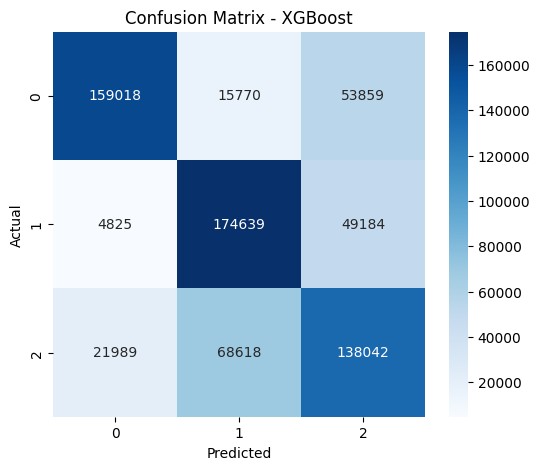

In [109]:
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test2, y_pred_xgb1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [111]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mae = mean_absolute_error(y_test2, y_pred_xgb1)
mse = mean_squared_error(y_test2, y_pred_xgb1)
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")

Mean Absolute Error (MAE): 0.4229
Mean Squared Error (MSE): 0.6441


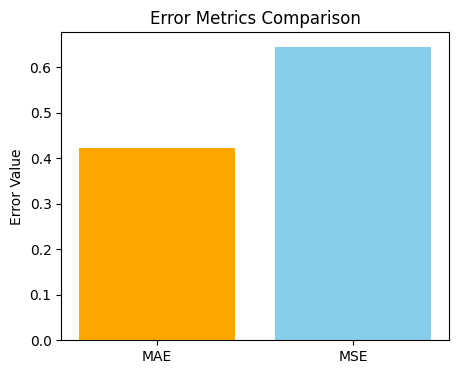

In [113]:
plt.figure(figsize=(5, 4))
plt.bar(['MAE', 'MSE'], [mae, mse], color=['orange', 'skyblue'])
plt.title("Error Metrics Comparison")
plt.ylabel("Error Value")
plt.show()

In [114]:
importances = final_xgb1.feature_importances_
features = X_train2.columns

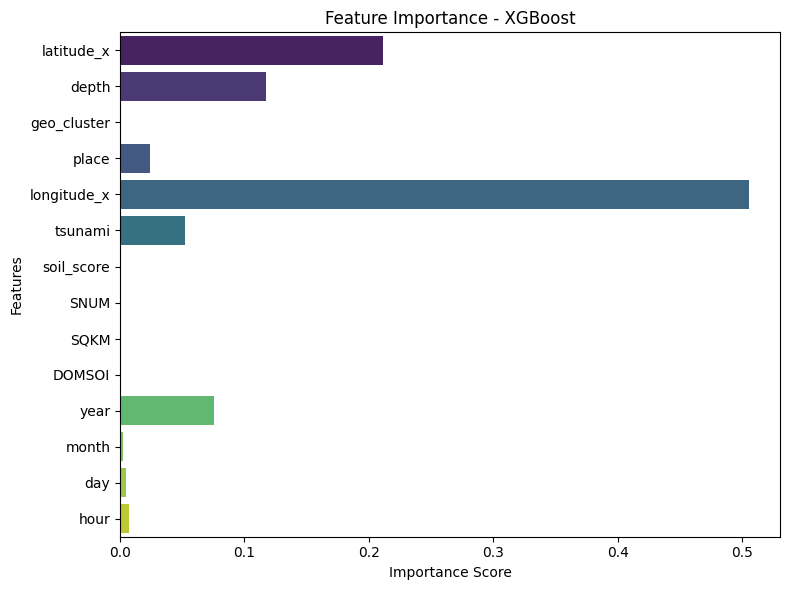

In [115]:
plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=features, orient='h', palette='viridis')
plt.title("Feature Importance - XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [ ]:
important_features = ['longitude_x', 'latitude_x', 'depth', 'year']
X_important = X_train2[important_features]
X_test_important = X_test2[important_features]
xgb_model.fit(X_important, y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=600, n_jobs=None,
              num_parallel_tree=None, ...)

In [48]:
y_pred = xgb_model.predict(X_test_important)
accuracy = accuracy_score(y_test2, y_pred)
mae = mean_absolute_error(y_test2, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

Accuracy: 0.6857
Mean Absolute Error: 0.4250


In [50]:
joblib.dump(xgb_model, "xgboost_final.pkl")

['xgboost_final.pkl']

In [52]:
import joblib
model_path = r"C:\Users\Akshaya\OneDrive\Desktop\xgboost_final.pkl"
xgb_model = joblib.load(model_path)

In [67]:
data = {
    'longitude_x': [0.068854],
    'latitude_x': [0.603812],
    'depth': [0.022238],
    'year': [0.0]
}

In [68]:
X_single = pd.DataFrame(data)

In [74]:
actual_value = 1

In [75]:
print("Predicted Risk Category:", prediction[0])
print("Actual Risk Category:", actual_value)

Predicted Risk Category: 1
Actual Risk Category: 1


In [48]:
zero_cols = [col for col in df.columns if (df[col].sum() == 0)]
print("Columns with all 0 values:", zero_cols)

Columns with all 0 values: ['geo_cluster', 'tsunami', 'soil_score', 'SNUM', 'SQKM', 'DOMSOI', 'hour']


In [49]:
drop_cols = ['geo_cluster', 'tsunami', 'soil_score', 'SNUM', 'SQKM', 'DOMSOI', 'hour']
df.drop(columns=drop_cols, inplace=True)

In [50]:
df.columns.tolist()

['latitude_x',
 'depth',
 'place',
 'longitude_x',
 'risk_score',
 'final_risk_index',
 'risk_category',
 'year',
 'month',
 'day',
 'lat_lon_product',
 'depth_squared',
 'month_sin',
 'month_cos',
 'region_cluster',
 'depth_log',
 'lat_diff',
 'lon_diff']

In [51]:
print(df['risk_score'].describe())

count    1.048575e+06
mean     6.520507e-01
std      6.278718e-02
min      0.000000e+00
25%      6.136262e-01
50%      6.392833e-01
75%      6.789416e-01
max      1.000000e+00
Name: risk_score, dtype: float64


In [52]:
print("Unique values in risk_score:", df['risk_score'].unique())
print("Number of unique values:", df['risk_score'].nunique())

Unique values in risk_score: [0.67498285 0.62973528 0.61542828 ... 0.71107477 0.63984514 0.59369953]
Number of unique values: 620741


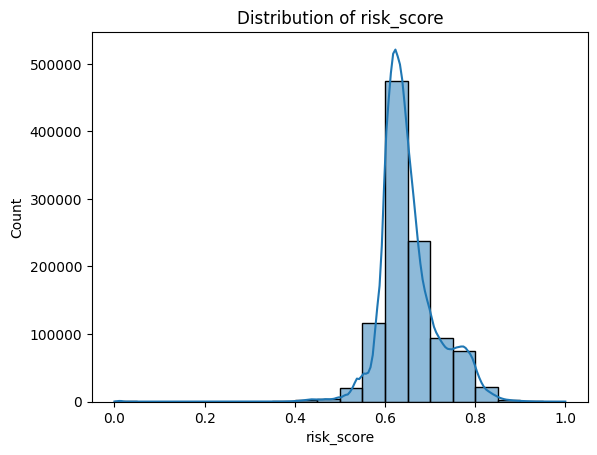

In [53]:
sns.histplot(df['risk_score'], bins=20, kde=True)
plt.title('Distribution of risk_score')
plt.show()

In [54]:
corr_risk = df[['risk_score', 'final_risk_index', 'risk_category']].corr(numeric_only=True)
print("Correlation matrix:\n", corr_risk)

print("\nCorrelation of risk_score with risk_category:", corr_risk.loc['risk_score', 'risk_category'])
print("Correlation of risk_score with final_risk_index:", corr_risk.loc['risk_score', 'final_risk_index'])

Correlation matrix:
                   risk_score  final_risk_index  risk_category
risk_score           1.00000           1.00000       -0.58036
final_risk_index     1.00000           1.00000       -0.58036
risk_category       -0.58036          -0.58036        1.00000

Correlation of risk_score with risk_category: -0.5803601206264148
Correlation of risk_score with final_risk_index: 0.9999999999999776


In [58]:
df['lat_lon_product'] = df['latitude_x'] * df['longitude_x']
df['depth_squared'] = df['depth'] ** 2

In [59]:
df['month_sin'] = np.sin(2 * np.pi * df['month']/12)
df['month_cos'] = np.cos(2 * np.pi * df['month']/12)

In [60]:
from sklearn.cluster import KMeans
df['region_cluster'] = KMeans(n_clusters=10, random_state=42).fit_predict(df[['latitude_x', 'longitude_x']])
print(df[['lat_lon_product', 'depth_squared', 'month_sin', 'month_cos', 'region_cluster']].head())

   lat_lon_product  depth_squared  month_sin  month_cos  region_cluster
0         0.071758       0.002891        0.5   0.866025               7
1         0.041565       0.000495        0.5   0.866025               8
2         0.114028       0.000314        0.5   0.866025               1
3         0.120774       0.000159        0.5   0.866025               1
4         0.117508       0.001227        0.5   0.866025               1


In [62]:
print(df[['lat_lon_product', 'depth_squared', 'month_sin', 'month_cos', 'region_cluster']].head())

   lat_lon_product  depth_squared  month_sin  month_cos  region_cluster
0         0.071758       0.002891        0.5   0.866025               7
1         0.041565       0.000495        0.5   0.866025               8
2         0.114028       0.000314        0.5   0.866025               1
3         0.120774       0.000159        0.5   0.866025               1
4         0.117508       0.001227        0.5   0.866025               1


In [63]:
le = LabelEncoder()
df['place'] = le.fit_transform(df['place'])
df['region_cluster'] = le.fit_transform(df['region_cluster'])

In [29]:
le = LabelEncoder()
df['place'] = le.fit_transform(df['place'])
df['region_cluster'] = le.fit_transform(df['region_cluster'])

In [65]:
X = df.drop(columns=['risk_category'])
y = df['risk_category']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
scaler = MinMaxScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train)
X_test[X_test.columns] = scaler.transform(X_test)

In [69]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
xgb_model = XGBClassifier(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

In [70]:
print("XGBoost", round(accuracy_score(y_test, y_pred_xgb) * 100, 2), "%")

XGBoost 68.22 %


In [71]:
# LightGBM
lgb_model = LGBMClassifier(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026125 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2305
[LightGBM] [Info] Number of data points in the train set: 838860, number of used features: 10
[LightGBM] [Info] Start training from score -0.883544
[LightGBM] [Info] Start training from score -1.641754
[LightGBM] [Info] Start training from score -0.933833


In [72]:
print("LightGBM Accuracy:", round(accuracy_score(y_test, y_pred_lgb) * 100, 2), "%")

LightGBM Accuracy: 67.61 %


In [73]:
#Applying SMOTE 
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)
print("Before SMOTE:\n", y_train.value_counts())
print("\nAfter SMOTE:\n", y_train_bal.value_counts())

Before SMOTE:
 risk_category
0    346714
2    329709
1    162437
Name: count, dtype: int64

After SMOTE:
 risk_category
1    346714
2    346714
0    346714
Name: count, dtype: int64


In [ ]:
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = ['place', 'region_cluster']

X_num = X_train[num_cols]
y = y_train
smote = SMOTE(random_state=42)
X_num_bal, y_bal = smote.fit_resample(X_num, y)
X_cat_bal = X_train.loc[X_train.index.repeat(len(X_num_bal)//len(X_train))][cat_cols].reset_index(drop=True)
X_train_bal = pd.concat([X_num_bal.reset_index(drop=True), X_cat_bal], axis=1)
y_train_bal = y_bal

In [ ]:
print(X_train_bal.columns[X_train_bal.columns.duplicated()].tolist())

['place', 'region_cluster']


In [89]:
X_train_bal = X_train_bal.loc[:, ~X_train_bal.columns.duplicated()]
X_test = X_test.loc[:, ~X_test.columns.duplicated()]

In [90]:
for col in ['place', 'region_cluster']:
    X_train_bal[col] = X_train_bal[col].astype(str)
    X_test[col] = X_test[col].astype(str)

In [91]:
cat_features = ['place', 'region_cluster']
train_pool = Pool(X_train_bal, y_train_bal, cat_features=cat_features)
test_pool = Pool(X_test, y_test, cat_features=cat_features)

In [ ]:
cat_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=8,
    l2_leaf_reg=3,
    bootstrap_type='Bernoulli',  
    subsample=0.8,
    random_seed=42,
    eval_metric='Accuracy',
    verbose=100,
    task_type='CPU'  
)

In [95]:
cat_model.fit(train_pool, eval_set=test_pool, use_best_model=True)
y_pred_cat = cat_model.predict(X_test)

0:	learn: 0.5971290	test: 0.5736213	best: 0.5736213 (0)	total: 1.72s	remaining: 14m 16s
100:	learn: 0.6604579	test: 0.6422573	best: 0.6422573 (100)	total: 2m 46s	remaining: 10m 56s
200:	learn: 0.6689817	test: 0.6481511	best: 0.6481511 (200)	total: 5m 31s	remaining: 8m 13s
300:	learn: 0.6735128	test: 0.6513506	best: 0.6513793 (299)	total: 7m 43s	remaining: 5m 6s
400:	learn: 0.6762106	test: 0.6523520	best: 0.6524188 (399)	total: 10m 22s	remaining: 2m 33s
499:	learn: 0.6785468	test: 0.6532342	best: 0.6533486 (494)	total: 12m 34s	remaining: 0us

bestTest = 0.6533485921
bestIteration = 494

Shrink model to first 495 iterations.


In [97]:
print("CatBoost", round(accuracy_score(y_test, y_pred_cat) * 100, 2), "%")

CatBoost 65.33 %


In [98]:
cat_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.03,        
    depth=10,                  
    l2_leaf_reg=5,             
    bootstrap_type='Bernoulli',
    subsample=0.9,
    border_count=128,          
    random_seed=42,
    eval_metric='Accuracy',
    verbose=200,
    task_type='CPU'
)
cat_model.fit(train_pool, eval_set=test_pool, use_best_model=True)

0:	learn: 0.6009901	test: 0.5926376	best: 0.5926376 (0)	total: 2.85s	remaining: 47m 32s
200:	learn: 0.6671589	test: 0.6471735	best: 0.6472355 (199)	total: 11m 28s	remaining: 45m 35s
400:	learn: 0.6743839	test: 0.6504780	best: 0.6505257 (392)	total: 22m 49s	remaining: 34m 5s
600:	learn: 0.6786939	test: 0.6533629	best: 0.6533629 (600)	total: 34m 16s	remaining: 22m 45s
800:	learn: 0.6822309	test: 0.6555993	best: 0.6555993 (800)	total: 43m 20s	remaining: 10m 46s
999:	learn: 0.6846671	test: 0.6576163	best: 0.6577021 (993)	total: 53m 50s	remaining: 0us

bestTest = 0.6577021195
bestIteration = 993

Shrink model to first 994 iterations.


In [100]:
y_pred_cat = cat_model.predict(X_test)
acc = accuracy_score(y_test, y_pred_cat)
print("CatBoost Accuracy:", round(acc * 100, 2), "%")

CatBoost Accuracy: 65.77 %


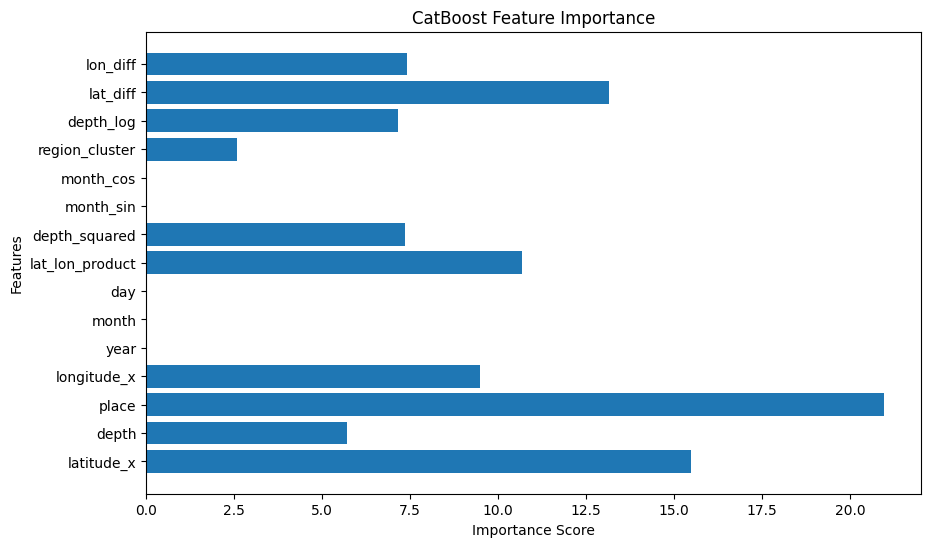

In [101]:
feature_importances = cat_model.get_feature_importance(train_pool)
features = X_train_bal.columns
plt.figure(figsize=(10,6))
plt.barh(features, feature_importances)
plt.title("CatBoost Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [102]:
output_path = r"C:\Users\Akshaya\OneDrive\Desktop\VI\processed_eq_soil_merged.csv"
df.to_csv(output_path, index=False)
print(f"Processed dataset saved successfully at: {output_path}")

Processed dataset saved successfully at: C:\Users\Akshaya\OneDrive\Desktop\VI\processed_eq_soil_merged.csv
